# HIDE

HIDE (Hydrogen (HI) Data Emulator) is a package for simulating of a single dish radio telescope survey. As such, it takes healpix maps as inputs and processes them into TOD. The design is flexible and can be customized to different instruments and survey designs.

For more info, visit [this page](seek.readthedocs.io)

## Installation

HIDE can be installed using the command line as follows :-

1. Clone the HIDE github repository - 
       git clone https://github.com/cosmo-ethz/hide.git
2. Navigate to the cloned directory - 
        cd hide
3. Install the package using pip - 
        pip install -r requirements.txt
        python setup.py install --user

## Usage

HIDE can be run from the command line as follows - 

```hide --strategy-start=2016-03-21-00:00:00 --strategy-end=2016-03-21-23:59:00 --verbose=True hide.config.bleien7m```

This generates one day worth of data. We can control the amount of data we want by changing the value of the 'strategy-start' and 'strategy-end' parameters. For example. if we want to generate data from March 21st 2016 to April 15th 2016, the command would be as follows - 

```hide --strategy-start=2016-03-21-00:00:00 --strategy-end=2016-04-15-23:59:00 --verbose=True hide.config.bleien7m```

The verbose parameter gives frequent updates regarding the progress of the data generation.

Optionally, a software called hdfview can be installed to view the raw .h5 files generated by HIDE. The software can be installed through the command line as follows - 
   
   ```sudo apt-get install hdfview```

## Visualization

The following code can be run to visualize the data generated by HIDE - 

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import os
import h5py

# To override a warning
plt.rcParams.update({'figure.max_open_warning': 0})

# Make a directory to store the visualizations
os.makedirs("hide_visualization")

# Navigate to the directory
os.chdir("hide_visualization/")

# Export visualization of the generated data
# For some reason it skips over certain files but you get enough images to get a feel of what the data is
indir = '../2016/03/21'
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        try:
            with h5py.File(os.path.join(root, f), "r") as fp:
                 tod = fp["P/Phase1"].value
                 time = fp["TIME"].value
            fig = plt.figure()
            plt.imshow(tod, aspect="auto", extent=(time[0], time[-1],990, 1260), cmap="gist_earth", norm=matplotlib.colors.LogNorm())
            plt.colorbar()
            name = f + ".png"
            fig.savefig(name)
            plt.close(fig)   
        except IOError:
            pass
        

For example, the visualization for one file should look as follows - 

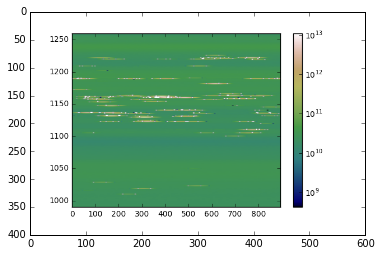

In [2]:
img = mpimg.imread('TEST_MP_PXX_20160321_234500.h5.png')
imgplot = plt.imshow(img)
plt.show()

Here the x-axis represents the time duration and y-axis represents frequency. To make any sense out of this data, we need to either use the SEEK package to further process the data, or we can use an image segmentation algorithm.